Load in our data

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from jupyterlab.semver import valid
from pandas import value_counts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=1)

train = pd.read_csv(r'C:\Users\jakub.barut\PycharmProjects\Titanic-survivor-prediction\train.csv')
test = pd.read_csv(r'C:\Users\jakub.barut\PycharmProjects\Titanic-survivor-prediction\test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Handling missing values

In [143]:
train.isnull().sum()
# Get the average number for age
mean_age = train['Age'].mean()
# Fill in the values by average
train['Age'].fillna(mean_age, inplace=True)
# Fill missing values as N = No cabin
train['Cabin'].fillna('N', inplace=True)
# 2 Missing values so just fill in with most common
train['Embarked'].fillna('S', inplace=True)
# Show df
train


C:\Users\jakub.barut\AppData\Local\Temp\ipykernel_3096\3007559037.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(mean_age, inplace=True)
C:\Users\jakub.barut\AppData\Local\Temp\ipykernel_3096\3007559037.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Data analysis

In [144]:
#Find the usefull information
for col in train.columns:
    print(train.groupby(col)['Survived'].mean())

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float64
Survived
0    0.0
1    1.0
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Name
Abbing, Mr. Anthony                      0.0
Abbott, Mr. Rossmore Edward              0.0
Abbott, Mrs. Stanton (Rosa Hunt)         1.0
Abelson, Mr. Samuel                      0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    1.0
                                        ... 
de Mulder, Mr. Theodore                  1.0
de Pelsmaeker, Mr. Alfons                0.0
del Carlo, Mr. Sebastiano                0.0
van Billiard, Mr. Austin Blyler          0.0
van Melkebeke, Mr. Philemon              0.0
Name: Survived, Length: 891, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0

<Axes: xlabel='Fare', ylabel='Sex'>

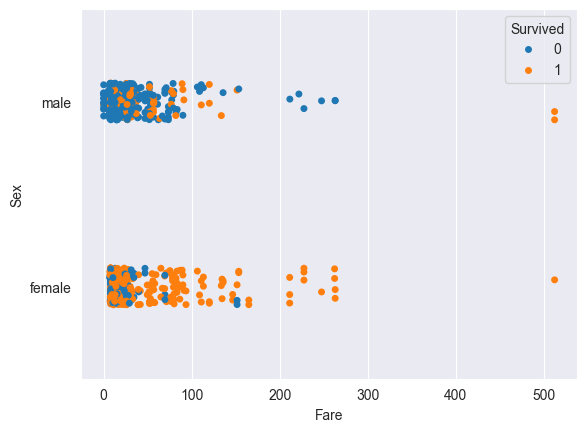

In [145]:
sns.stripplot(data=train , x = train['Fare'], y = train['Sex'] , hue='Survived')

Now lets feature engineer our data for the model


In [146]:
#Copy to not change original df
train_eng = train.copy()
# Extract the varios titles from "Name"
train_eng["Title"] = train_eng["Name"].str.extract(r",\s*([^\.]+)\.")
# Count the titles and show them
train_eng["Title"].value_counts()
train_eng.drop(['PassengerId', 'Survived',], axis=1, inplace=True)
# Separete the rere ones into their own category
threshold = 39

value_counts = train_eng['Title'].value_counts()
rare_categories = value_counts[value_counts > threshold].index

train_eng['titles_grouped'] = train_eng['Title'].where(train_eng['Title'].isin(rare_categories), other='Rare')
train.head()
# We can assume that the captian will always go down with ship for fun >:)
train_eng.loc[train_eng["Title"] == "Capt", "Survived"] = 0
# Drop useless columns
train_eng.drop(['Title'], axis=1, inplace=True)
train_eng.drop(['Name' ], axis=1, inplace=True)
# Encode sex
train_eng['Sex'] = train_eng['Sex'].map({'male': 0, 'female': 1})
# Drop all tickets
train_eng.drop(['Ticket'], axis=1, inplace=True)





In [147]:
# Make dummies for categorical data (One-hot encoding)
train_eng = train_eng.drop('Embarked', axis=1).join(
    pd.get_dummies(train_eng['Embarked'], prefix='Embarked', dtype=float)
)
train_eng = train_eng.drop('Cabin', axis=1).join(
    pd.get_dummies(train_eng['Cabin'], prefix='Cabin', dtype=float)
)
train_eng = train_eng.drop('titles_grouped', axis=1).join(
    pd.get_dummies(train_eng['titles_grouped'], prefix='titles_grouped', dtype=float)
)
# Start the model
y = train.Survived
train_X, val_X, train_y, val_y = train_test_split(train_eng, y, random_state=7)

train_X.head()
model.fit(train_X, train_y)

predictions = model.predict(val_X)
acc = accuracy_score(val_y, predictions)

print()
#print(mean_absolute_error(val_y, predictions , "%"))
print()
print(acc, "%")





0.7085201793721974 %
